In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# directories
main_dir = os.path.join(os.getcwd())
data_dir = os.path.join(main_dir, "Data")

In [3]:
# load data 
precovid_data = pd.read_csv(os.path.join(data_dir, 'precovid_crime_micro_geo_11_29_2021.csv'))
covid_data = pd.read_csv(os.path.join(data_dir, 'covid_crime_micro_geo_11_29_2021.csv'))

In [4]:
precovid_data = precovid_data.drop(columns=['Unnamed: 0'])
covid_data = covid_data.drop(columns=['Unnamed: 0'])

In [5]:
precovid_data.head()

,SHIFT,OFFENSE,WARD,LATITUDE,LONGITUDE,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ward_1,ward_2,ward_3,ward_4,ward_5,ward_6,ward_7,ward_8,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,MIDNIGHT,THEFT F/AUTO,5.0,38.918707,-76.962533,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.127080,0.674769,0.077614
1,MIDNIGHT,ASSAULT W/DANGEROUS WEAPON,6.0,38.907643,-77.009053,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.191281,0.079607,0.049559
2,MIDNIGHT,THEFT F/AUTO,6.0,38.901323,-77.016914,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.083639,0.124886,0.068719
3,DAY,THEFT F/AUTO,6.0,38.883239,-77.018730,2017-10-27,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.135380,0.296590,0.074763
4,DAY,THEFT/OTHER,5.0,38.920933,-76.997157,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.084503,0.849526,0.047963


In [6]:
# # shift one hot encode
# shift_dummies_precovid = pd.get_dummies(precovid_data.SHIFT)
# precovid_data = pd.concat([precovid_data, shift_dummies_precovid], axis=1)

# shift_dummies_covid = pd.get_dummies(covid_data.SHIFT)
# covid_data = pd.concat([covid_data, shift_dummies_covid], axis=1)

# # method one hot encode
# shift_dummies_precovid = pd.get_dummies(precovid_data.METHOD)
# precovid_data = pd.concat([precovid_data, shift_dummies_precovid], axis=1)

# shift_dummies_covid = pd.get_dummies(covid_data.METHOD)
# covid_data = pd.concat([covid_data, shift_dummies_covid], axis=1)

In [7]:
# drop shift, offense, date columns
precovid_data_baseline = precovid_data.drop(columns=['daily_cases', 'daily_death', 'OUT_POSITIVE_QUARANTINE_PSMPD',
                                                     'total_cases', 'SHIFT', 'OFFENSE', 'date', 'LATITUDE', 'LONGITUDE', 
                                                     'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 
                                                     'ward_6', 'ward_7', 'ward_8'])
covid_data_baseline = covid_data.drop(columns=['SHIFT', 'OFFENSE', 'date', 'LATITUDE', 'LONGITUDE', 'total_cases', 
                                            'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 'ward_6', 
                                            'ward_7', 'ward_8'])

In [8]:
# declare target and features
y_precovid_base = precovid_data_baseline.pop('WARD') 
X_precovid_base = precovid_data_baseline

y_covid_base = covid_data_baseline.pop('WARD') 
X_covid_base = covid_data_baseline

In [9]:
# train test split
X_precovid_train, X_precovid_test, y_precovid_train, y_precovid_test = train_test_split(X_precovid_base, 
                                                                                        y_precovid_base, 
                                                                                        test_size=0.3, 
                                                                                        random_state=42)

X_covid_train, X_covid_test, y_covid_train, y_covid_test = train_test_split(X_covid_base, 
                                                                            y_covid_base, 
                                                                            test_size=0.3, 
                                                                            random_state=42)

In [10]:
# scale data - MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X_precovid_train)
X_precovid_train_scaled = scaler.transform(X_precovid_train)
X_precovid_test_scaled = scaler.transform(X_precovid_test)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X_covid_train)
X_covid_train_scaled = scaler.transform(X_covid_train)
X_covid_test_scaled = scaler.transform(X_covid_test)

# scale data - Standard Scaler
scaler2 = StandardScaler()
scaler2 = scaler2.fit(X_precovid_train)
X_precovid_train_scaled2 = scaler2.transform(X_precovid_train)
X_precovid_test_scaled2 = scaler2.transform(X_precovid_test)

scaler2 = StandardScaler()
scaler2 = scaler2.fit(X_covid_train)
X_covid_train_scaled2 = scaler2.transform(X_covid_train)
X_covid_test_scaled2 = scaler2.transform(X_covid_test)

## Run models with Min Max Scaler

In [11]:
# instantiate model precovid
LDA_precovid = LinearDiscriminantAnalysis()

# precovid train
LDA_precovid.fit(X_precovid_train_scaled, y_precovid_train)
# make predictions
y_precovid_pred = LDA_precovid.predict(X_precovid_test_scaled)
# score
precovid_score = LDA_precovid.score(X_precovid_test_scaled, y_precovid_test)
print(precovid_score)

0.415293215791491


In [12]:
# instantiate model precovid
LDA_covid = LinearDiscriminantAnalysis()

# precovid train
LDA_covid.fit(X_covid_train_scaled, y_covid_train)
# make predictions
y_covid_pred = LDA_covid.predict(X_covid_test_scaled)
# score
covid_score = LDA_covid.score(X_covid_test_scaled, y_covid_test)
print(covid_score)

0.41173745173745174


## Run Models with Standard Scaler

In [13]:
# instantiate model precovid
LDA_precovid = LinearDiscriminantAnalysis()

# precovid train
LDA_precovid.fit(X_precovid_train_scaled2, y_precovid_train)
# make predictions
y_precovid_pred = LDA_precovid.predict(X_precovid_test_scaled2)
# score
precovid_score = LDA_precovid.score(X_precovid_test_scaled2, y_precovid_test)
print(precovid_score)

0.415293215791491


In [14]:
# instantiate model covid
LDA_covid = LinearDiscriminantAnalysis()

# precovid train
LDA_covid.fit(X_covid_train_scaled2, y_covid_train)
# make predictions
y_covid_pred = LDA_covid.predict(X_covid_test_scaled2)
# score
covid_score = LDA_covid.score(X_covid_test_scaled2, y_covid_test)
print(covid_score)

0.41173745173745174


In [15]:
grid = {"shrinkage":['auto'], 
        "n_components":(1,5,1), 
        "solver":('lsqr', 'eigen')}

# instantiate model
LDA_precovid = LinearDiscriminantAnalysis()

# precovid
LDA_precovid_CV = GridSearchCV(LDA_precovid, grid, cv=3, n_jobs=-1)
# fit precovid
LDA_precovid_CV.fit(X_precovid_train_scaled, y_precovid_train)
# make predictions
y_precovid_pred = LDA_precovid_CV.predict(X_precovid_test_scaled)

print(LDA_precovid_CV.best_params_, LDA_precovid_CV.best_score_)

{'n_components': 1, 'shrinkage': 'auto', 'solver': 'lsqr'} 0.41874851908452393


In [16]:
# instantiate model
LDA_covid = LinearDiscriminantAnalysis()

# precovid
LDA_covid_CV = GridSearchCV(LDA_covid, grid, cv=3, n_jobs=-1)
# fit precovid
LDA_covid_CV.fit(X_covid_train_scaled, y_covid_train)
# make predictions
y_covid_pred = LDA_covid_CV.predict(X_covid_test_scaled)

print(LDA_covid_CV.best_params_, LDA_covid_CV.best_score_)

{'n_components': 1, 'shrinkage': 'auto', 'solver': 'lsqr'} 0.41702553319669694


<AxesSubplot:>

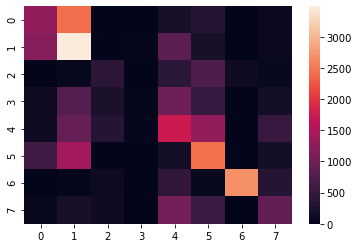

In [17]:
sns.heatmap(confusion_matrix(y_precovid_test, y_precovid_pred))

# Experiment

In [18]:
# experiment datasets
# precovid exp data now HAS the covid columns -- all values are 0
precovid_data_exp = precovid_data.drop(columns=['total_cases', 'SHIFT', 'OFFENSE', 'date', 'LATITUDE', 'LONGITUDE', 
                                                     'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 
                                                     'ward_6', 'ward_7', 'ward_8'])
# covid exp data doest NOT have covid columns
covid_data_exp = covid_data.drop(columns=['daily_cases', 'daily_death', 'OUT_POSITIVE_QUARANTINE_PSMPD',
                                                     'total_cases', 'SHIFT', 'OFFENSE', 'date', 'LATITUDE', 'LONGITUDE', 
                                                     'ward_1', 'ward_2', 'ward_3', 'ward_4', 'ward_5', 
                                                     'ward_6', 'ward_7', 'ward_8'])

In [19]:
# declare target and features for EXP
y_precovid_exp = precovid_data_exp.pop('WARD') 
X_precovid_exp = precovid_data_exp

y_covid_exp = covid_data_exp.pop('WARD') 
X_covid_exp = covid_data_exp

In [20]:
# train test split for EXP
X_precovid_train_EXP, X_precovid_test_EXP, y_precovid_train_EXP, y_precovid_test_EXP = train_test_split(
                                                                                        X_precovid_exp, 
                                                                                        y_precovid_exp, 
                                                                                        test_size=0.3, 
                                                                                        random_state=42)

X_covid_train_EXP, X_covid_test_EXP, y_covid_train_EXP, y_covid_test_EXP = train_test_split(X_covid_exp, 
                                                                            y_covid_exp, 
                                                                            test_size=0.3, 
                                                                            random_state=42)

In [21]:
# SCALE EXP DATA
# scale data - MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X_precovid_train_EXP)
X_precovid_train_scaled_EXP = scaler.transform(X_precovid_train_EXP)
X_precovid_test_scaled_EXP = scaler.transform(X_precovid_test_EXP)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X_covid_train_EXP)
X_covid_train_scaled_EXP = scaler.transform(X_covid_train_EXP)
X_covid_test_scaled_EXP = scaler.transform(X_covid_test_EXP)

# scale data - Standard Scaler
scaler2 = StandardScaler()
scaler2 = scaler2.fit(X_precovid_train_EXP)
X_precovid_train_scaled2_EXP = scaler2.transform(X_precovid_train_EXP)
X_precovid_test_scaled2_EXP = scaler2.transform(X_precovid_test_EXP)

scaler2 = StandardScaler()
scaler2 = scaler2.fit(X_covid_train_EXP)
X_covid_train_scaled2_EXP = scaler2.transform(X_covid_train_EXP)
X_covid_test_scaled2_EXP = scaler2.transform(X_covid_test_EXP)

In [22]:
# precovid experiment 
# predict
y_precovid_pred_EXP = LDA_precovid_CV.predict(X_covid_test_scaled_EXP)
# score
precovid_score_EXP = LDA_precovid_CV.score(X_covid_test_scaled_EXP, y_covid_test_EXP)
print(precovid_score_EXP)

0.4050965250965251


In [23]:
# covid experiment
# predict
y_covid_pred_EXP = LDA_covid_CV.predict(X_precovid_test_scaled_EXP)
# score
covid_score_EXP = LDA_covid_CV.score(X_precovid_test_scaled_EXP, y_precovid_test_EXP)
print(covid_score_EXP)

0.39255142455602404
